In [ ]:

!pip install matplotlib deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.6 MB/s eta 0:00:00


gen	nevals	avg    	min     
0  	300   	564.481	0.480948
1  	213   	540.926	1.8089  
2  	243   	531.302	7.78303 
3  	232   	527.065	3.92117 
4  	233   	517.15 	3.92117 
5  	218   	515.086	4.34241 
6  	213   	514.419	3.66287 
7  	233   	502.33 	2.0661  
8  	219   	489.982	3.01462 
9  	209   	480.817	0.571607
10 	224   	471.743	0.571607
11 	230   	466.114	0.571607
12 	230   	459.672	3.85183 
13 	217   	445.412	2.11672 
14 	231   	442.354	9.90571 
15 	250   	439.42 	7.76359 
16 	238   	435.86 	5.38945 
17 	236   	426.354	5.94366 
18 	225   	417.112	9.70901 
19 	225   	409.442	6.42203 
20 	209   	398.322	1.10941 
21 	232   	395.195	9.97942 
22 	237   	387.433	2.38063 
23 	217   	370.1  	18.5453 
24 	227   	357.457	9.47247 
25 	246   	344.077	9.53028 
26 	233   	331.147	11.0725 
27 	219   	323.808	2.77038 
28 	229   	318.719	6.64326 
29 	223   	314.347	4.75617 
30 	238   	314.365	8.93949 
31 	225   	313.139	6.95975 
32 	221   	315.332	2.77038 
33 	243   	308.987	10.5036 
34 	232   	308.857	1

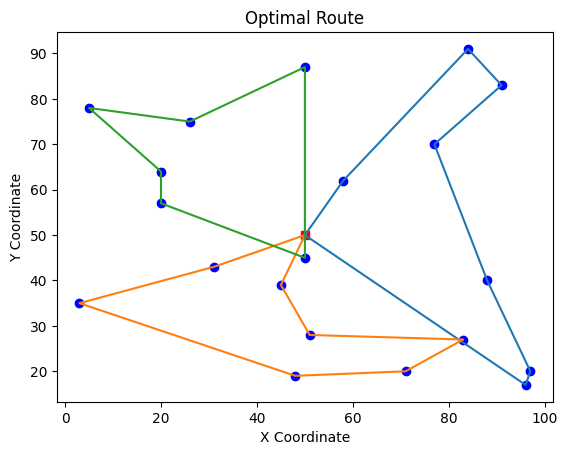

In [ ]:
# Required Libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

# Task 1 - Define the number of locations and vehicles
num_locations = 20  # Define how many locations (excluding the depot) the vehicles need to visit
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]  # Generate random (x, y) coordinates for each location
depot = (50, 50)  # Define the central depot location as a fixed point
num_vehicles = 3  # Define how many vehicles are available to visit the locations

# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # Define fitness function to minimize. The two objectives are total distance and balance penalty.
creator.create("Individual", list, fitness=creator.FitnessMin)  # Define individual structure. Individuals are lists with a fitness attribute.

# Task 2 - Finish setting up the individuals and population
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)  # Function to generate a list of unique, randomly ordered location indices
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)  # Function to create an individual as a shuffled list of location indices
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Function to create a population of individuals

# Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)  # Register the evaluation function
toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection

# Plotting Function
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()
